In [4]:
import pandas as pd 
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from datetime import datetime as dt


# Read the Datasets. (year 2004-05 ds alone not considered) 

In [5]:
df1= pd.read_csv('2000-01.csv')
df2= pd.read_csv('2001-02.csv')
df3= pd.read_csv('2002-03.csv')
df4= pd.read_csv('2003-04.csv')
#df5= pd.read_csv('2004-05.csv') [not working due to utf-8 error ]
df6= pd.read_csv('2005-06.csv')
df7= pd.read_csv('2006-07.csv')
df8= pd.read_csv('2007-08.csv')
df9= pd.read_csv('2008-09.csv')
df10= pd.read_csv('2009-10.csv')
df11= pd.read_csv('2010-11.csv')
df12= pd.read_csv('2011-12.csv')
df13= pd.read_csv('2012-13.csv')
df14= pd.read_csv('2013-14.csv')
df15= pd.read_csv('2014-15.csv')
df16= pd.read_csv('2015-16.csv')
df17= pd.read_csv('2016-17.csv')
df18= pd.read_csv('2017-18.csv')

print(df1.head())
print(df18.tail())

  Div        Date  HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0  E0  19/08/2000  Charlton       Man City     4     0   H     2     0   H   
1  E0  19/08/2000   Chelsea       West Ham     4     2   H     1     0   H   
2  E0  19/08/2000  Coventry  Middlesbrough     1     3   A     1     1   D   
3  E0  19/08/2000     Derby    Southampton     2     2   D     1     2   A   
4  E0  19/08/2000     Leeds        Everton     2     0   H     2     0   H   

  ...  HC AC  HF  AF  HO  AO  HY  AY  HR  AR  
0 ...   6  6  13  12   8   6   1   2   0   0  
1 ...   7  7  19  14   2   3   1   2   0   0  
2 ...   8  4  15  21   1   3   5   3   1   0  
3 ...   5  8  11  13   0   2   1   1   0   0  
4 ...   6  4  21  20   6   1   1   3   0   0  

[5 rows x 28 columns]
    Div        Date     HomeTeam   AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
375  E0  13/05/2018    Newcastle    Chelsea     3     0   H     1     0   H   
376  E0  13/05/2018  Southampton   Man City     0     1   A     0   

In [6]:
# Parse date as time 

def parse_date_other(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%d/%m/%Y').date()

In [7]:

df1.Date = df1.Date.apply(parse_date_other)    
df2.Date = df2.Date.apply(parse_date_other)    
df3.Date = df3.Date.apply(parse_date_other)           
df4.Date = df4.Date.apply(parse_date_other)    
#df5.Date = df5.Date.apply(parse_date_other)    
df6.Date = df6.Date.apply(parse_date_other)    
df7.Date = df7.Date.apply(parse_date_other)    
df8.Date = df8.Date.apply(parse_date_other)    
df9.Date = df9.Date.apply(parse_date_other)    
df10.Date = df10.Date.apply(parse_date_other)
df11.Date = df11.Date.apply(parse_date_other)
df12.Date = df12.Date.apply(parse_date_other)
df13.Date = df13.Date.apply(parse_date_other)
df14.Date = df14.Date.apply(parse_date_other)
df15.Date = df15.Date.apply(parse_date_other)
df16.Date = df16.Date.apply(parse_date_other)
df17.Date = df17.Date.apply(parse_date_other)
df18.Date = df18.Date.apply(parse_date_other)



In [8]:

                      
req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HS','AS',
      'HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']

play_stats_1 = df1[req]                      
play_stats_2 = df2[req]
play_stats_3 = df3[req]
play_stats_4 = df4[req]
#play_stats_5 = df5[req]
play_stats_6 = df6[req]
play_stats_7 = df7[req]
play_stats_8 = df8[req]
play_stats_9 = df9[req]
play_stats_10 = df10[req]
play_stats_11 = df11[req]   
play_stats_12 = df12[req]
play_stats_13 = df13[req]
play_stats_14 = df14[req]
play_stats_15 = df15[req]
play_stats_13 = df13[req]
play_stats_14 = df14[req]
play_stats_15 = df15[req]
play_stats_16 = df16[req]
play_stats_17 = df17[req]
play_stats_18 = df18[req]



In [9]:
# Concatonating playing statistics

play_stats = pd.concat([play_stats_1, play_stats_2, play_stats_3, play_stats_4,
                        play_stats_6, play_stats_7, play_stats_8,
                        play_stats_9, play_stats_10, play_stats_11,play_stats_12, 
                        play_stats_13, play_stats_14, play_stats_15,play_stats_16,
                        play_stats_17,play_stats_18])


In [10]:
play_stats.head(n=15)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2000-08-19,Charlton,Man City,4,0,H,17,8,14,4,13,12,6,6,1,2,0,0
1,2000-08-19,Chelsea,West Ham,4,2,H,17,12,10,5,19,14,7,7,1,2,0,0
2,2000-08-19,Coventry,Middlesbrough,1,3,A,6,16,3,9,15,21,8,4,5,3,1,0
3,2000-08-19,Derby,Southampton,2,2,D,6,13,4,6,11,13,5,8,1,1,0,0
4,2000-08-19,Leeds,Everton,2,0,H,17,12,8,6,21,20,6,4,1,3,0,0
5,2000-08-19,Leicester,Aston Villa,0,0,D,5,5,4,3,12,12,5,4,2,3,0,0
6,2000-08-19,Liverpool,Bradford,1,0,H,16,3,10,2,8,8,6,1,1,1,0,0
7,2000-08-19,Sunderland,Arsenal,1,0,H,8,14,2,7,10,21,2,9,3,1,0,1
8,2000-08-19,Tottenham,Ipswich,3,1,H,20,15,6,5,14,13,3,4,0,0,0,0
9,2000-08-20,Man United,Newcastle,2,0,H,19,9,9,6,7,13,7,1,0,1,0,0


In [11]:
play_stats.tail(n=15)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
365,2018-05-09,Chelsea,Huddersfield,1,1,D,22,3,5,2,7,10,9,0,0,1,0,0
366,2018-05-09,Leicester,Arsenal,3,1,H,19,14,10,7,7,12,6,6,2,2,0,1
367,2018-05-09,Man City,Brighton,3,1,H,19,6,7,3,5,7,4,3,0,1,0,0
368,2018-05-09,Tottenham,Newcastle,1,0,H,11,14,7,3,10,8,6,4,2,3,0,0
369,2018-05-10,West Ham,Man United,0,0,D,9,16,2,6,12,12,1,6,1,1,0,0
370,2018-05-13,Burnley,Bournemouth,1,2,A,12,16,4,5,14,9,7,8,0,0,0,0
371,2018-05-13,Crystal Palace,West Brom,2,0,H,11,7,5,1,10,11,4,2,2,3,0,0
372,2018-05-13,Huddersfield,Arsenal,0,1,A,18,9,3,4,11,7,7,4,1,0,0,0
373,2018-05-13,Liverpool,Brighton,4,0,H,22,2,11,1,3,6,7,3,0,0,0,0
374,2018-05-13,Man United,Watford,1,0,H,7,7,1,3,6,11,6,5,4,0,0,0



# Plot bar graph to see number of home/away wins or draw in each season

Text(0.5,0,'Season')

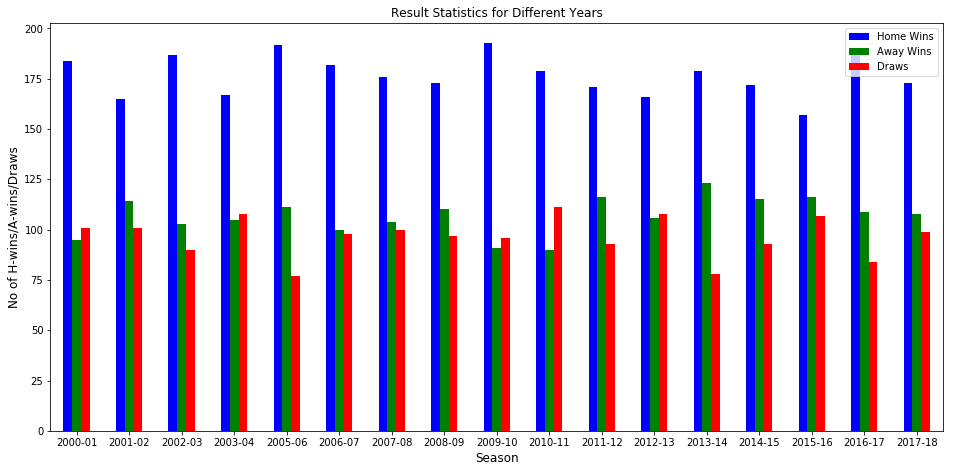

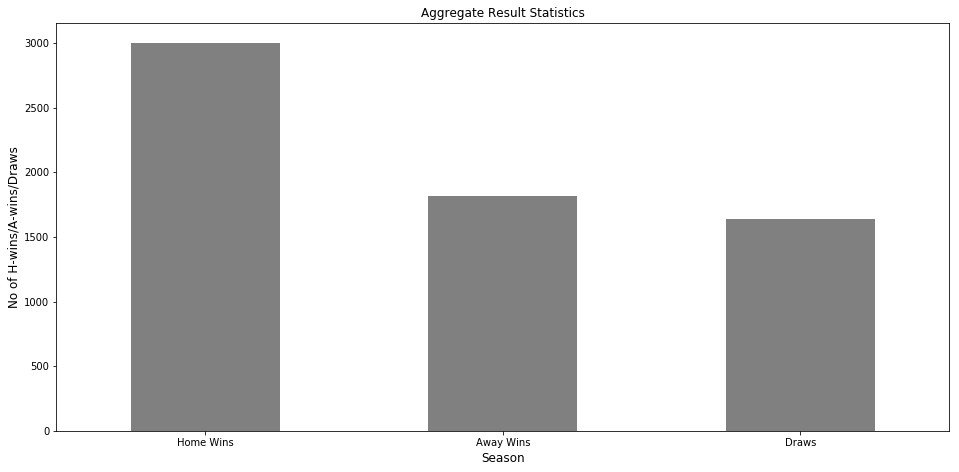

In [12]:
def get_rs(playing_stats, year):
    return pd.DataFrame(data = [ len(playing_stats[playing_stats.FTR == 'H']),
                                 len(playing_stats[playing_stats.FTR == 'A']),
                                 len(playing_stats[playing_stats.FTR == 'D'])],
                        index = ['Home Wins', 'Away Wins', 'Draws'],
                        columns =[year]
                       ).T

rs_agg = get_rs(play_stats, 'Overall')

rs_1 = get_rs(play_stats_1, '2000-01')
rs_2 = get_rs(play_stats_2, '2001-02')
rs_3 = get_rs(play_stats_3, '2002-03')
rs_4 = get_rs(play_stats_4, '2003-04')
#rs_5 = get_rs(play_stats_5, '2004-05')
rs_6 = get_rs(play_stats_6, '2005-06')
rs_7 = get_rs(play_stats_7, '2006-07')
rs_8 = get_rs(play_stats_8, '2007-08')
rs_9 = get_rs(play_stats_9, '2008-09')
rs_10 = get_rs(play_stats_10, '2009-10')
rs_11 = get_rs(play_stats_11, '2010-11')
rs_12 = get_rs(play_stats_12, '2011-12')
rs_13 = get_rs(play_stats_13, '2012-13')
rs_14 = get_rs(play_stats_14, '2013-14')
rs_15 = get_rs(play_stats_15, '2014-15')
rs_16 = get_rs(play_stats_16, '2015-16')
rs_17 = get_rs(play_stats_17, '2016-17')
rs_18 = get_rs(play_stats_18, '2017-18')

rs = pd.concat([rs_1, rs_2, rs_3, rs_4,
                rs_6, rs_7, rs_8, rs_9, rs_10,
                rs_11, rs_12, rs_13, rs_14, rs_15,rs_16,rs_17,rs_18])

#Plotting the result
ax = rs.plot(kind='bar', color = ['blue','green', 'red'], figsize = [16,7.5], 
                       title='Result Statistics for Different Years')
plt.xticks(rotation=0)
ax.set_ylabel('No of H-wins/A-wins/Draws', size=12)
ax.set_xlabel('Season', size=12)

#Plotting agg result 
ax1 = rs_agg.T.plot(kind='bar', color = ['grey'], figsize = [16,7.5],title='Aggregate Result Statistics', legend = False)
plt.xticks(rotation=0)
ax1.set_ylabel('No of H-wins/A-wins/Draws', size=12)
ax1.set_xlabel('Season', size=12)

In [13]:
#Away wins and Draws are almost equal showing home teams are always advantageous

print(rs)

print(rs_agg)

         Home Wins  Away Wins  Draws
2000-01        184         95    101
2001-02        165        114    101
2002-03        187        103     90
2003-04        167        105    108
2005-06        192        111     77
2006-07        182        100     98
2007-08        176        104    100
2008-09        173        110     97
2009-10        193         91     96
2010-11        179         90    111
2011-12        171        116     93
2012-13        166        106    108
2013-14        179        123     78
2014-15        172        115     93
2015-16        157        116    107
2016-17        187        109     84
2017-18        173        108     99
         Home Wins  Away Wins  Draws
Overall       3003       1816   1641


In [14]:
result_prop = rs.T

for column in result_prop.columns:
    result_prop[column] = (result_prop[column] * 100) / 380   #No. of total matches in a year

# Print the dataframe
result_prop

,2000-01,2001-02,2002-03,2003-04,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18
Home Wins,48.421053,43.421053,49.210526,43.947368,50.526316,47.894737,46.315789,45.526316,50.789474,47.105263,45.000000,43.684211,47.105263,45.263158,41.315789,49.210526,45.526316
Away Wins,25.000000,30.000000,27.105263,27.631579,29.210526,26.315789,27.368421,28.947368,23.947368,23.684211,30.526316,27.894737,32.368421,30.263158,30.526316,28.684211,28.421053
Draws,26.578947,26.578947,23.684211,28.421053,20.263158,25.789474,26.315789,25.526316,25.263158,29.210526,24.473684,28.421053,20.526316,24.473684,28.157895,22.105263,26.052632


# calculate and plot aggregate win % and draw % (home,away and draw)

,Win Percentage
Home Wins,46.486068
Away Wins,28.111455
Draws,25.402477


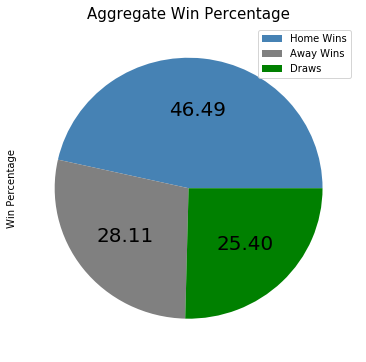

In [15]:
# Calculating average win percentage for each side:
result_avg_prop = pd.DataFrame((result_prop['2000-01'] + result_prop['2001-02'] + result_prop['2002-03'] +
                                result_prop['2003-04'] + result_prop['2005-06'] +result_prop['2006-07'] + 
                                result_prop['2007-08'] + result_prop['2008-09'] + 
                                result_prop['2009-10'] + result_prop['2010-11'] + result_prop['2011-12'] + 
                                result_prop['2012-13'] + result_prop['2013-14'] + result_prop['2014-15'] +
                                result_prop['2015-16']+ result_prop['2016-17'] + result_prop['2017-18']) / 17, 
                                columns = ['Win Percentage'])

# Plots average win percentage as a pie chart.
ax = result_avg_prop.plot(kind='pie', figsize =[6,6],autopct='%.2f', y='Win Percentage', fontsize =20, labels = None,
                          legend = True, colors = ['steelblue','grey','green'])

ax.set_title('Aggregate Win Percentage', size=15)
result_avg_prop

In [13]:
# Gets the goals scored agg arranged by teams and matchweek

def get_goals_scored(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        HTGS = playing_stat.iloc[i]['FTHG']
        ATGS = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGS)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGS)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsScored[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored



# Gets the goals conceded agg arranged by teams and matchweek
def get_goals_conceded(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG']
        HTGC = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGC)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsConceded = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsConceded[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded

def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_scored(playing_stat)
   
    j = 0
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])
        
        if ((i + 1)% 10) == 0:
            j = j + 1
        
    playing_stat['HTGS'] = HTGS
    playing_stat['ATGS'] = ATGS
    playing_stat['HTGC'] = HTGC
    playing_stat['ATGC'] = ATGC
    
    return playing_stat


# Apply to each dataset
play_stats_1 = get_gss(play_stats_1)
play_stats_2 = get_gss(play_stats_2)
play_stats_3 = get_gss(play_stats_3)
play_stats_4 = get_gss(play_stats_4)
#play_stats_5 = get_gss(play_stats_5)
play_stats_6 = get_gss(play_stats_6)
play_stats_7 = get_gss(play_stats_7)
play_stats_8 = get_gss(play_stats_8)
play_stats_9 = get_gss(play_stats_9)
play_stats_10 = get_gss(play_stats_10)
play_stats_11 = get_gss(play_stats_11)
play_stats_12 = get_gss(play_stats_12)
play_stats_13 = get_gss(play_stats_13)
play_stats_14 = get_gss(play_stats_14)
play_stats_15 = get_gss(play_stats_15)
play_stats_16 = get_gss(play_stats_16)
play_stats_17 = get_gss(play_stats_17)
#play_stats_18 = get_gss(play_stats_18)


C:\Users\SATHYA CHAKRAVARTHY\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\SATHYA CHAKRAVARTHY\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\SATHYA CHAKRAVARTHY\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

In [14]:
play_stats_17.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,HC,AC,HY,AY,HR,AR,HTGS,ATGS,HTGC,ATGC
0,2016-08-13,Burnley,Swansea,0,1,A,10,17,3,9,...,7,4,3,2,0,0,0,0,0,0
1,2016-08-13,Crystal Palace,West Brom,0,1,A,14,13,4,3,...,3,6,2,2,0,0,0,0,0,0
2,2016-08-13,Everton,Tottenham,1,1,D,12,13,6,4,...,5,6,0,0,0,0,0,0,0,0
3,2016-08-13,Hull,Leicester,2,1,H,14,18,5,5,...,5,3,2,2,0,0,0,0,0,0
4,2016-08-13,Man City,Sunderland,2,1,H,16,7,4,3,...,9,6,1,2,0,0,0,0,0,0


In [15]:
def get_points(result):
    if result == 'W':
        return 3     #3 points for winning the game
    elif result == 'D':
        return 1     #1 point for winning the game
    else:
        return 0     #0 for losing
    

def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    for i in range(2,39):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
        
    matchres_points.insert(column =0, loc = 0, value = [0*i for i in range(20)])
    return matchres_points


def get_matchres(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            teams[playing_stat.iloc[i].HomeTeam].append('W')
            teams[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            teams[playing_stat.iloc[i].AwayTeam].append('W')
            teams[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_stat.iloc[i].AwayTeam].append('D')
            teams[playing_stat.iloc[i].HomeTeam].append('D')
            
    return pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T

def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    j = 0
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1)% 10) == 0:
            j = j + 1
            
    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat
    
# Apply to each dataset
play_stats_1 = get_agg_points(play_stats_1)
play_stats_2 = get_agg_points(play_stats_2)
play_stats_3 = get_agg_points(play_stats_3)
play_stats_4 = get_agg_points(play_stats_4)
#play_stats_5 = get_agg_points(play_stats_5)
play_stats_6 = get_agg_points(play_stats_6)
play_stats_7 = get_agg_points(play_stats_7)
play_stats_8 = get_agg_points(play_stats_8)
play_stats_9 = get_agg_points(play_stats_9)
play_stats_10 = get_agg_points(play_stats_10)
play_stats_11 = get_agg_points(play_stats_11)
play_stats_12 = get_agg_points(play_stats_12)
play_stats_13 = get_agg_points(play_stats_13)
play_stats_14 = get_agg_points(play_stats_14)
play_stats_15 = get_agg_points(play_stats_15)
play_stats_16 = get_agg_points(play_stats_16)
play_stats_17 = get_agg_points(play_stats_17)


C:\Users\SATHYA CHAKRAVARTHY\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\SATHYA CHAKRAVARTHY\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
play_stats_13.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,HY,AY,HR,AR,HTGS,ATGS,HTGC,ATGC,HTP,ATP
0,2012-08-18,Arsenal,Sunderland,0,0,D,14,3,4,2,...,0,0,0,0,0,0,0,0,0,0
1,2012-08-18,Fulham,Norwich,5,0,H,11,4,9,2,...,0,0,0,0,0,0,0,0,0,0
2,2012-08-18,Newcastle,Tottenham,2,1,H,6,12,4,6,...,2,2,0,0,0,0,0,0,0,0
3,2012-08-18,QPR,Swansea,0,5,A,20,12,11,8,...,2,2,0,0,0,0,0,0,0,0
4,2012-08-18,Reading,Stoke,1,1,D,9,6,3,3,...,2,4,0,1,0,0,0,0,0,0


In [17]:
def get_form(playing_stat,num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    for i in range(num,39):
        form_final[i] = ''
        j = 0
        while j < num:
            form_final[i] += form[i-j]
            j += 1           
    return form_final

def add_form(playing_stat,num):
    form = get_form(playing_stat,num)
    h = ['M' for i in range(num * 10)]  # since form is not available for n MW (n*10)
    a = ['M' for i in range(num * 10)]
    
    j = num
    for i in range((num*10),380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        
        past = form.loc[ht][j]               # get past n results
        h.append(past[num-1])                    # 0 index is most recent
        
        past = form.loc[at][j]               # get past n results.
        a.append(past[num-1])                   # 0 index is most recent
        
        if ((i + 1)% 10) == 0:
            j = j + 1

    playing_stat['HM' + str(num)] = h                 
    playing_stat['AM' + str(num)] = a

    
    return playing_stat


def add_form_df(play_stats):
    play_stats = add_form(play_stats,1)
    play_stats = add_form(play_stats,2)
    play_stats = add_form(play_stats,3)
    play_stats = add_form(play_stats,4)
    play_stats = add_form(play_stats,5)
    return play_stats    
    
# Make changes to df
play_stats_1 = add_form_df(play_stats_1)
play_stats_2 = add_form_df(play_stats_2)
play_stats_3 = add_form_df(play_stats_3)
play_stats_4 = add_form_df(play_stats_4)
#play_stats_5 = add_form_df(play_stats_5)
play_stats_6 = add_form_df(play_stats_6)
play_stats_7 = add_form_df(play_stats_7)
play_stats_8 = add_form_df(play_stats_8)
play_stats_9 = add_form_df(play_stats_9)
play_stats_10 = add_form_df(play_stats_10)
play_stats_11 = add_form_df(play_stats_11)
play_stats_12 = add_form_df(play_stats_12)
play_stats_13 = add_form_df(play_stats_13)
play_stats_14 = add_form_df(play_stats_14)
play_stats_15 = add_form_df(play_stats_15)    
play_stats_16 = add_form_df(play_stats_16)
play_stats_17 = add_form_df(play_stats_17)
#play_stats_18 = add_form_df(play_stats_18)

C:\Users\SATHYA CHAKRAVARTHY\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\SATHYA CHAKRAVARTHY\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
play_stats_13.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5
0,2012-08-18,Arsenal,Sunderland,0,0,D,14,3,4,2,...,M,M,M,M,M,M,M,M,M,M
1,2012-08-18,Fulham,Norwich,5,0,H,11,4,9,2,...,M,M,M,M,M,M,M,M,M,M
2,2012-08-18,Newcastle,Tottenham,2,1,H,6,12,4,6,...,M,M,M,M,M,M,M,M,M,M
3,2012-08-18,QPR,Swansea,0,5,A,20,12,11,8,...,M,M,M,M,M,M,M,M,M,M
4,2012-08-18,Reading,Stoke,1,1,D,9,6,3,3,...,M,M,M,M,M,M,M,M,M,M


In [19]:
# Rearranging columns
cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5' ]

play_stats_1 = play_stats_1[cols]
play_stats_2 = play_stats_2[cols]
play_stats_3 = play_stats_3[cols]
play_stats_4 = play_stats_4[cols]
#play_stats_5 = play_stats_5[cols]
play_stats_6 = play_stats_6[cols]
play_stats_7 = play_stats_7[cols]
play_stats_8 = play_stats_8[cols]
play_stats_9 = play_stats_9[cols]
play_stats_10 = play_stats_10[cols]
play_stats_11 = play_stats_11[cols]
play_stats_12 = play_stats_12[cols]
play_stats_13 = play_stats_13[cols]
play_stats_14 = play_stats_14[cols]
play_stats_15 = play_stats_15[cols]
play_stats_16 = play_stats_16[cols]
play_stats_17 = play_stats_17[cols]
#play_stats_18 = play_stats_18[cols]

# Get previous year's standings in epl

In [20]:
Standings = pd.read_csv("EPLStandings.csv")
Standings.set_index(['Team'], inplace=True)
Standings = Standings.fillna(18)

def get_last(playing_stat, Standings, year):
    HomeTeamLP = []
    AwayTeamLP = []
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HomeTeamLP.append(Standings.loc[ht][year])
        AwayTeamLP.append(Standings.loc[at][year])
    playing_stat['HomeTeamLP'] = HomeTeamLP
    playing_stat['AwayTeamLP'] = AwayTeamLP
    return playing_stat

play_stats_1 = get_last(play_stats_1, Standings, 0)
play_stats_2 = get_last(play_stats_2, Standings, 1)
play_stats_3 = get_last(play_stats_3, Standings, 2)
play_stats_4 = get_last(play_stats_4, Standings, 3)
#play_stats_5 = get_last(play_stats_5, Standings, 4)
play_stats_6 = get_last(play_stats_6, Standings, 5)
play_stats_7 = get_last(play_stats_7, Standings, 6)
play_stats_8 = get_last(play_stats_8, Standings, 7)
play_stats_9 = get_last(play_stats_9, Standings, 8)
play_stats_10 = get_last(play_stats_10, Standings, 9)
play_stats_11 = get_last(play_stats_11, Standings, 10)
play_stats_12 = get_last(play_stats_12, Standings, 11)
play_stats_13 = get_last(play_stats_13, Standings, 12)
play_stats_14 = get_last(play_stats_14, Standings, 13)
play_stats_15 = get_last(play_stats_15, Standings, 14)
play_stats_16 = get_last(play_stats_16, Standings, 15)
play_stats_17 = get_last(play_stats_17, Standings, 16)
play_stats_18 = get_last(play_stats_18, Standings, 17)

# Get Matchweek 

In [21]:
def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    for i in range(380):
        MatchWeek.append(j)
        if ((i + 1)% 10) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat

play_stats_1 = get_mw(play_stats_1)
play_stats_2 = get_mw(play_stats_2)
play_stats_3 = get_mw(play_stats_3)
play_stats_4 = get_mw(play_stats_4)
#play_stats_5 = get_mw(play_stats_5)
play_stats_6 = get_mw(play_stats_6)
play_stats_7 = get_mw(play_stats_7)
play_stats_8 = get_mw(play_stats_8)
play_stats_9 = get_mw(play_stats_9)
play_stats_10 = get_mw(play_stats_10)
play_stats_11 = get_mw(play_stats_11)
play_stats_12 = get_mw(play_stats_12)
play_stats_13 = get_mw(play_stats_13)
play_stats_14 = get_mw(play_stats_14)
play_stats_15 = get_mw(play_stats_15)
play_stats_16 = get_mw(play_stats_16)
play_stats_17 = get_mw(play_stats_17)
play_stats_18 = get_mw(play_stats_18)

In [22]:
playing_stat = pd.concat([play_stats_1,
                          play_stats_2,
                          play_stats_3,
                          play_stats_4,
                          #play_stats_5,
                          play_stats_6,
                          play_stats_7,
                          play_stats_8,
                          play_stats_9,
                          play_stats_10,
                          play_stats_11,
                          play_stats_12,
                          play_stats_13,
                          play_stats_14,
                          play_stats_15,
                          play_stats_16,
                          play_stats_17,
                          play_stats_18],ignore_index=True)


# Gets the form points.
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

playing_stat['HTFormPtsStr'] = playing_stat['HM1'] + playing_stat['HM2'] + playing_stat['HM3'] + playing_stat['HM4'] + playing_stat['HM5']
playing_stat['ATFormPtsStr'] = playing_stat['AM1'] + playing_stat['AM2'] + playing_stat['AM3'] + playing_stat['AM4'] + playing_stat['AM5']

playing_stat['HTFormPts'] = playing_stat['HTFormPtsStr'].apply(get_form_points)
playing_stat['ATFormPts'] = playing_stat['ATFormPtsStr'].apply(get_form_points)

# Identify Win/Loss Streaks if any.
def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0
    
def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0
    
def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0
    
def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0
    
playing_stat['HTWinStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ws)
playing_stat['HTWinStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ws)
playing_stat['HTLossStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ls)
playing_stat['HTLossStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ls)

playing_stat['ATWinStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ws)
playing_stat['ATWinStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ws)
playing_stat['ATLossStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ls)
playing_stat['ATLossStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ls)

playing_stat.keys()

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'HomeTeamLP', 'AwayTeamLP', 'MW',
       'HTFormPtsStr', 'ATFormPtsStr', 'HTFormPts', 'ATFormPts',
       'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5',
       'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5'],
      dtype='object')

In [23]:
# Get Goal Difference
playing_stat['HTGD'] = playing_stat['HTGS'] - playing_stat['HTGC']
playing_stat['ATGD'] = playing_stat['ATGS'] - playing_stat['ATGC']

# Diff in points
playing_stat['DiffPts'] = playing_stat['HTP'] - playing_stat['ATP']
playing_stat['DiffFormPts'] = playing_stat['HTFormPts'] - playing_stat['ATFormPts']

# Diff in last year positions
playing_stat['DiffLP'] = playing_stat['HomeTeamLP'] - playing_stat['AwayTeamLP']

In [24]:
# Scale DiffPts , DiffFormPts, HTGD, ATGD by Matchweek.
cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']
playing_stat.MW = playing_stat.MW.astype(float)

for col in cols:
    playing_stat[col] = playing_stat[col] / playing_stat.MW

In [25]:
playing_stat.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
6075,2017-05-21,Liverpool,Middlesbrough,3,0,H,75,27,42,50,...,0,0,0,0,0,0.868421,-0.605263,1.184211,0.157895,-10.0
6076,2017-05-21,Man United,Crystal Palace,2,0,H,52,50,29,61,...,0,0,0,0,0,0.605263,-0.289474,0.657895,-0.078947,-10.0
6077,2017-05-21,Southampton,Stoke,0,1,A,41,40,47,56,...,0,0,0,0,0,-0.157895,-0.421053,0.131579,0.026316,-3.0
6078,2017-05-21,Swansea,West Brom,2,1,H,43,42,69,49,...,0,0,0,0,0,-0.684211,-0.184211,-0.184211,0.236842,-2.0
6079,2017-05-21,Watford,Man City,0,5,A,40,75,63,39,...,1,0,0,0,0,-0.605263,0.947368,-0.921053,-0.289474,9.0


In [29]:
def only_hw(string):
    if string == 'H':
        return 'H'
    else:
        return 'NH'
    
playing_stat['FTR'] = playing_stat.FTR.apply(only_hw)

# Testing set (2016-17 season)
playing_stat_test = playing_stat[6080:]

In [31]:
playing_stat.to_csv("D://Downloads//finally.csv")

playing_stat_test.to_csv("D://Downloads//test1.csv")